To convert the 3D coordinates (x, y, z) to 2D pixel coordinates on the image, we need to understand the camera's intrinsic and extrinsic parameters. These parameters define how 3D points are projected onto the 2D image plane. Here are the steps:

1. **Camera Intrinsic Parameters**: These parameters include the focal length (fx, fy), the optical center (cx, cy), and any lens distortion coefficients if necessary.

2. **Camera Extrinsic Parameters**: These parameters include the rotation matrix and the translation vector, which describe the camera's position and orientation in the world coordinate system.

3. **Projection Equation**: Use the projection equation to map 3D points to the 2D image plane.

### Step-by-Step Guide

1. **Define Camera Intrinsics**:
   - These are typically given or can be estimated through camera calibration. Assume some typical values if not available.

2. **Define Camera Extrinsics**:
   - These include the rotation matrix `R` and translation vector `T`. For simplicity, let's assume the camera is at the origin looking along the z-axis.

3. **Projection of 3D points to 2D**:
   - Apply the projection equation: 
   
   
   $\text{pixel\_coords} = \begin{bmatrix} fx & 0 & cx \\ 0 & fy & cy \\ 0 & 0 & 1 \end{bmatrix} \times [R | T] \times \begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix}$

### Explanation

- **Camera Intrinsics (`K`)**: This matrix transforms 3D camera coordinates to 2D image coordinates.
- **Extrinsic Parameters (`R`, `T`)**: These matrices transform world coordinates to camera coordinates. Here, we assumed the camera is at the origin with no rotation for simplicity.
- **Projection**: The 3D points are first transformed by the extrinsic parameters and then projected to 2D using the intrinsic matrix.

### Note

- **Calibration**: In a real scenario, you need to calibrate your camera to get accurate intrinsic and extrinsic parameters.
- **Distortion**: If your camera lens introduces distortion, you need to account for that as well.
- **Coordinate System**: Ensure your 3D coordinates and the camera coordinate system are aligned.

This method should give you the pixel coordinates of the 3D points on the 2D image. Adjust the intrinsic and extrinsic parameters according to your specific setup.

In [57]:
import os
import pandas as pd

# Sample data from a text file
""" 
Time (ms)	169448
Reference	-112.9437	180.4520	-208.2180	0.4736	0.4635	-0.5261	0.5330
Fenestrated	-21.9398	56.9237	-295.1500	0.0451	0.2661	-0.8368	-0.4763
Curved	-62.3648	51.9654	-243.1492	0.2314	0.3947	-0.7884	0.4112
Camera	-75.6810	35.3394	-270.7886	0.5233	-0.3824	-0.6371	-0.4171
"""


# Define the function to extract data from text files and create DataFrames for each tool
def extract_data(filepath):
    data = {"Reference": [], "Fenestrated": [], "Curved": [], "Camera": []}
    with open(filepath, "r") as file:
        lines = file.readlines()
        # Store time in milliseconds
        time = int(lines[0].split()[2])
        for line in lines[1:]:  # Skip the header
            parts = line.strip().split()
            if len(parts) == 8:
                label = parts[0]
                x, y, z = float(parts[1]), float(parts[2]), float(parts[3])
                qx, qy, qz, qw = (
                    float(parts[4]),
                    float(parts[5]),
                    float(parts[6]),
                    float(parts[7]),
                )
                data[label].append(
                    {
                        "x": x,
                        "y": y,
                        "z": z,
                        "qx": qx,
                        "qy": qy,
                        "qz": qz,
                        "qw": qw,
                    }
                )
    return data

In [27]:
# look at first 10 files
!ls "data/6DOF/Test 5" | head

0.bmp
0.mp4
0.txt
1.bmp
1.mp4
1.txt
10.bmp
10.txt
100.bmp
100.txt
ls: stdout: Undefined error: 0


In [70]:
data = extract_data("data/6DOF/Test 5/0.txt")
print(data)

{'Reference': [{'x': -107.4105, 'y': 181.3588, 'z': -192.0617, 'qx': 0.5012, 'qy': 0.4877, 'qz': -0.5019, 'qw': 0.5089}], 'Fenestrated': [{'x': -46.4807, 'y': 147.7925, 'z': -293.7982, 'qx': 0.0885, 'qy': 0.1001, 'qz': -0.9751, 'qw': -0.1771}], 'Curved': [{'x': -83.8522, 'y': 128.8187, 'z': -257.996, 'qx': 0.3525, 'qy': -0.3756, 'qz': 0.8536, 'qw': -0.0777}], 'Camera': [{'x': -79.2133, 'y': 34.2041, 'z': -265.7213, 'qx': 0.605, 'qy': -0.5124, 'qz': -0.5365, 'qw': -0.289}]}


In [26]:
import os 
import cv2
    
for file in os.listdir("data/6DOF/Test 5"):
    # check file not already converted
    new_file = file.replace(".bmp", ".png")
    new_file_path = os.path.join("data/6DOF/input", new_file)
    if file.endswith(".bmp") and not os.path.exists(new_file_path) and not file.startswith("."):
        img = cv2.imread(os.path.join("data/6DOF/Test 5", file))
        cv2.imwrite(new_file_path, img)
        print(f"Converted {file} to PNG")

In [123]:
import shutil
import os

from numpy import indices

# Define the source and destination directories
source_dir = "data/6DOF/inputs"
dest_dir = "data/6DOF/input"

# Create the destination directory if it doesn't exist, otherwise clear it
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)
else:
    shutil.rmtree(dest_dir)
    os.makedirs(dest_dir)

# Initialize the index and list for indices
index = 0
file_indices = []

# Get list of image files in the source directory
images = os.listdir(source_dir)

# Filter and sort image files
images = [i for i in images if i.endswith(".png") and not i.startswith(".")]
images = sorted(images, key=lambda x: int(x.split(".")[0]))

# Copy every 100th image to the destination directory
for file in images:
    if index % 100 == 0:
        shutil.copy(os.path.join(source_dir, file), os.path.join(dest_dir, file))
        file_indices.append(index)
    index += 1

# Remove 1900 and 2200
file_indices.remove(1900)
file_indices.remove(2200)

print(f"Total images copied: {len(file_indices)}")

Total images copied: 25


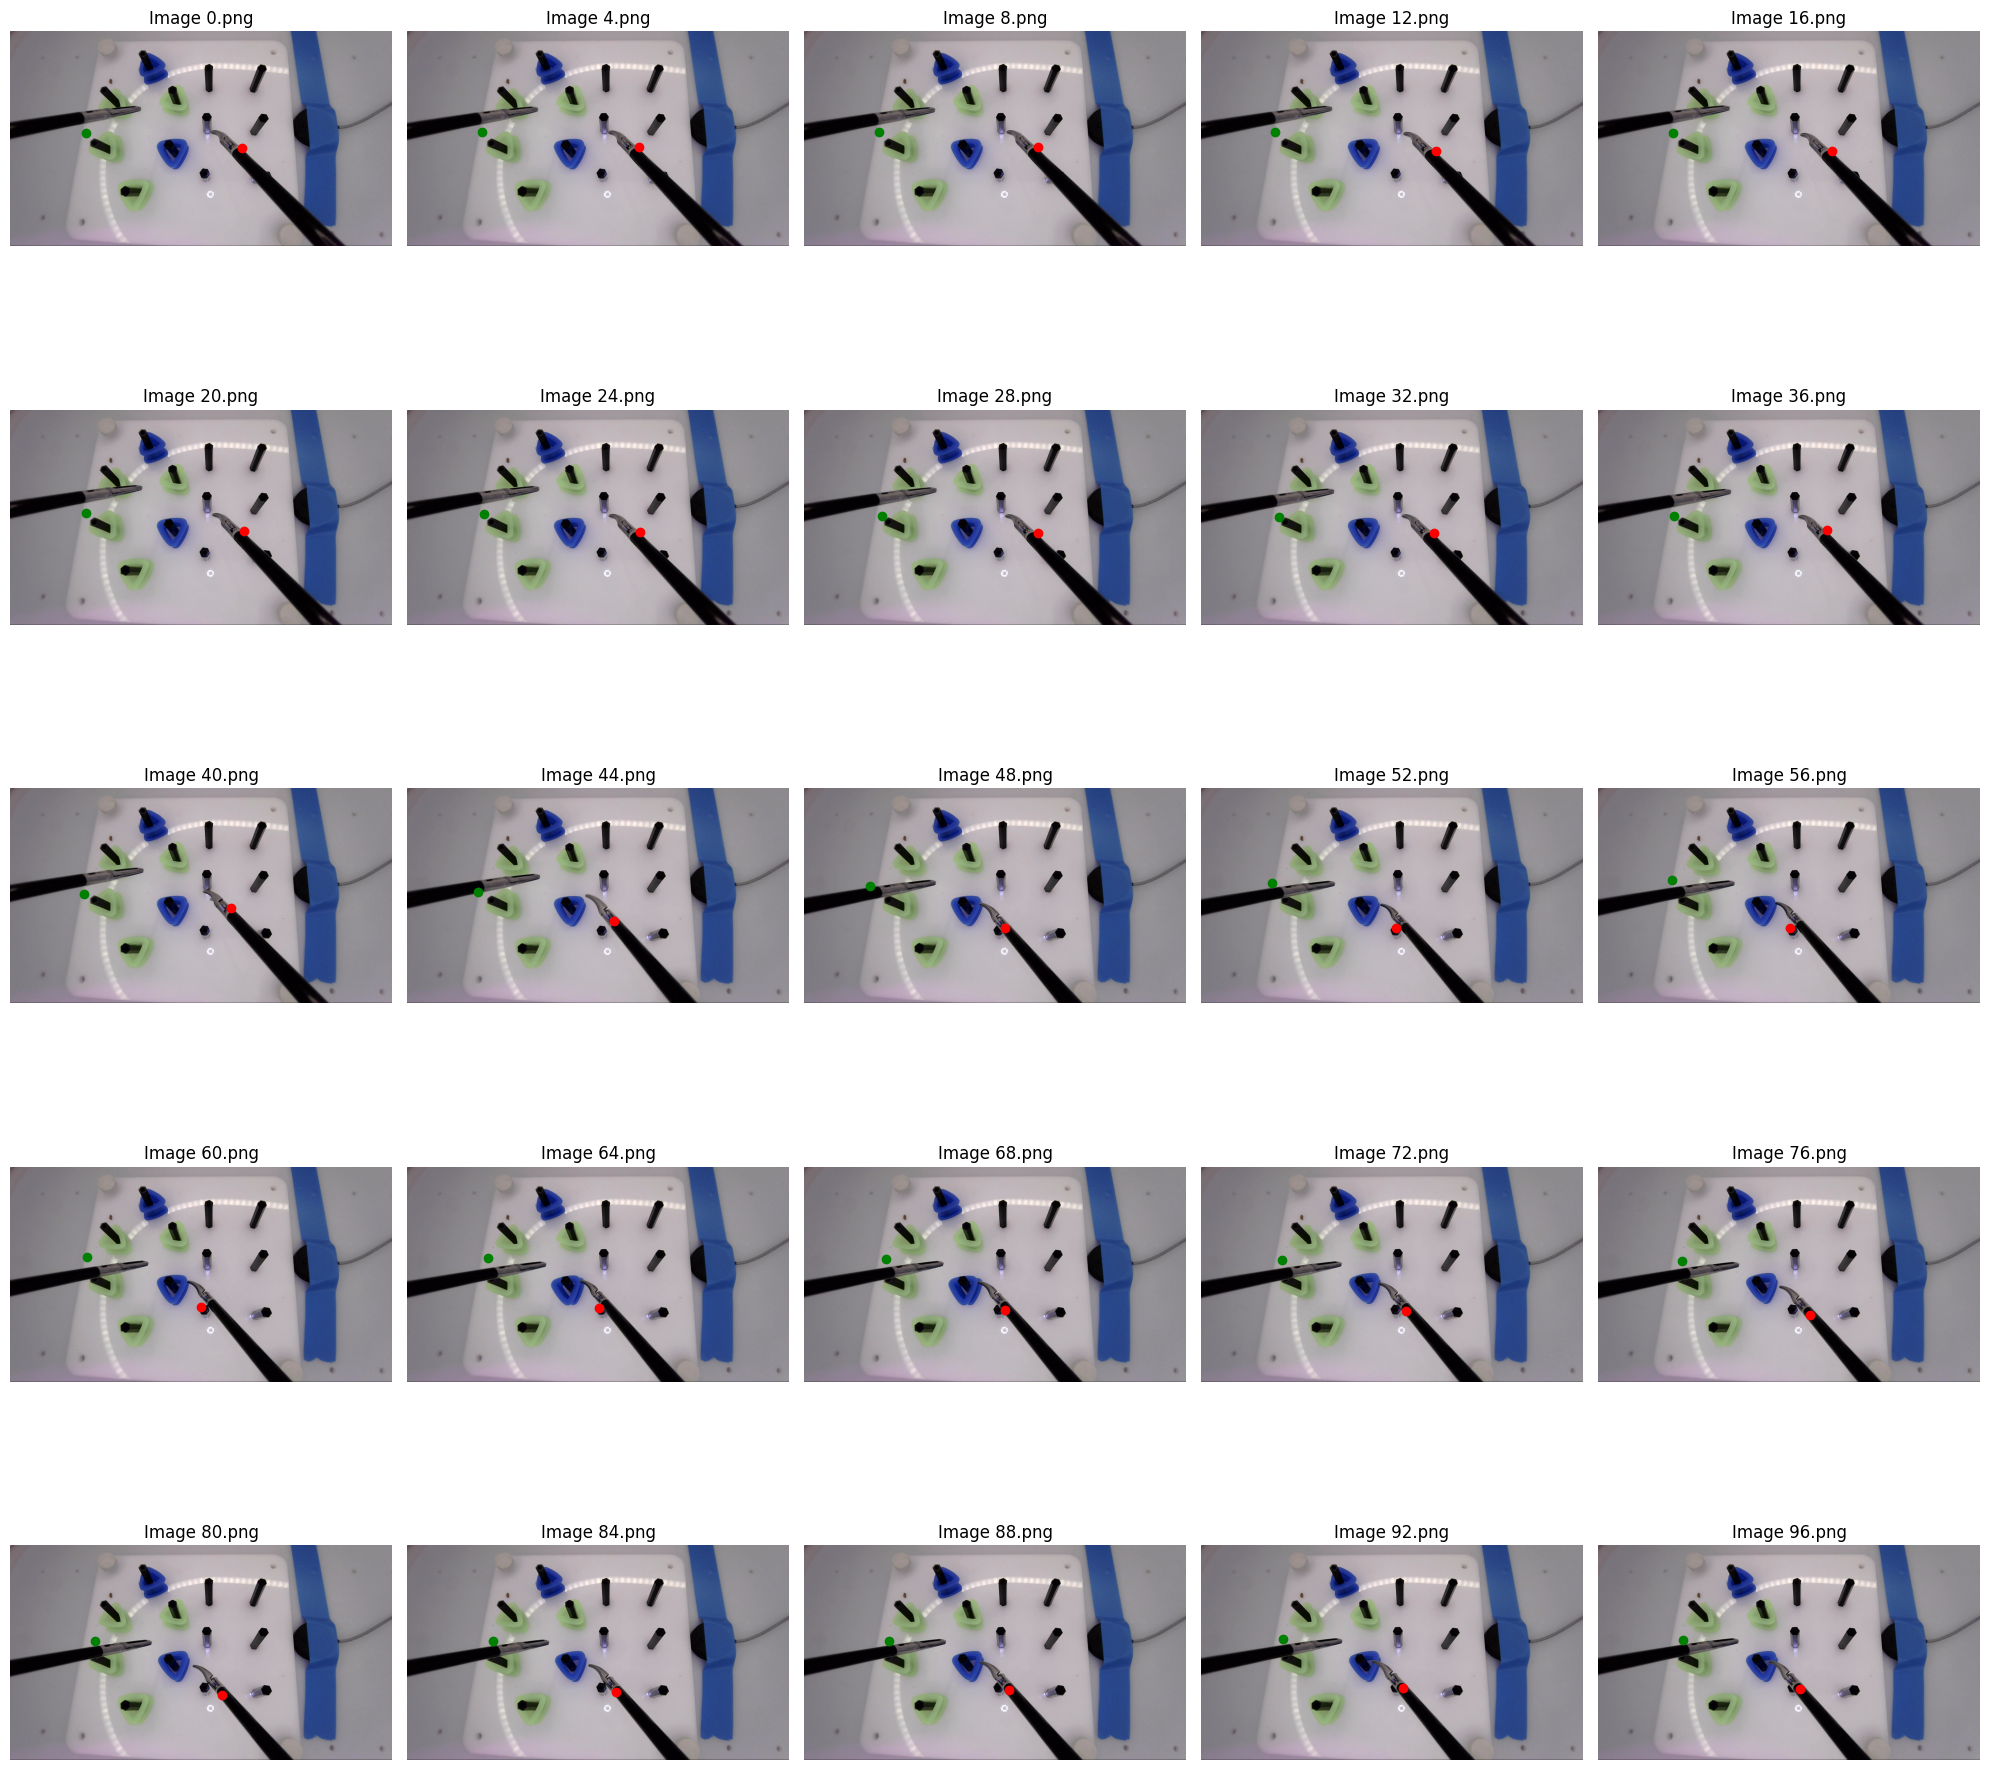

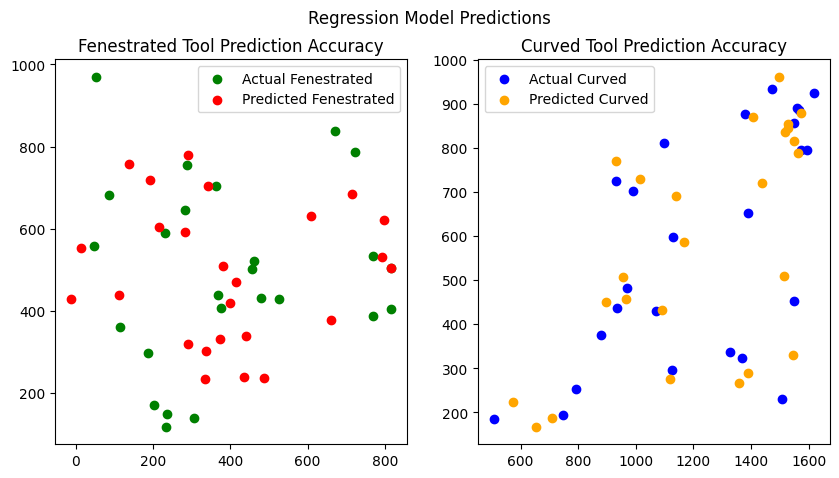

In [133]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from PIL import Image

# Directory containing JSON files and text files
json_dir = "data/6DOF/output"
txt_dir = "data/6DOF/Test 5"
input_dir = "data/6DOF/inputs"

# Initialize lists for 2D coordinates and 3D coordinates
fenestrated_2d = []
curved_2d = []
coordinates_3d = {"Fenestrated": [], "Curved": []}

# Extract 2D coordinates from JSON files
for i in file_indices:
    json_path = os.path.join(json_dir, f"{i}.json")
    if os.path.isfile(json_path):
        with open(json_path, "r") as f:
            output_json = json.load(f)
            if output_json.get("tooltips"):
                fenestrated_2d.append(
                    [output_json["tooltips"][0]["x"], output_json["tooltips"][0]["y"]]
                )
                curved_2d.append(
                    [output_json["tooltips"][1]["x"], output_json["tooltips"][1]["y"]]
                )

# Extract 3D coordinates from text files
for i in file_indices:
    data = extract_data(f"{txt_dir}/{i}.txt")
    coordinates_3d["Fenestrated"].append(
        [
            data["Fenestrated"][0]["x"],
            data["Fenestrated"][0]["y"],
            data["Fenestrated"][0]["z"],
        ]
    )
    coordinates_3d["Curved"].append(
        [data["Curved"][0]["x"], data["Curved"][0]["y"], data["Curved"][0]["z"]]
    )

# Convert lists to numpy arrays
fenestrated_2d = np.array(fenestrated_2d)
curved_2d = np.array(curved_2d)
coordinates_3d["Fenestrated"] = np.array(coordinates_3d["Fenestrated"])
coordinates_3d["Curved"] = np.array(coordinates_3d["Curved"])

# Ensure both arrays have the same number of entries for regression
min_len_fen = min(len(fenestrated_2d), len(coordinates_3d["Fenestrated"]))
min_len_curv = min(len(curved_2d), len(coordinates_3d["Curved"]))

fenestrated_2d = fenestrated_2d[:min_len_fen]
coordinates_3d["Fenestrated"] = coordinates_3d["Fenestrated"][:min_len_fen]

curved_2d = curved_2d[:min_len_curv]
coordinates_3d["Curved"] = coordinates_3d["Curved"][:min_len_curv]

# Fit regression models for fenestrated tool
reg_fen_x = LinearRegression().fit(coordinates_3d["Fenestrated"], fenestrated_2d[:, 0])
reg_fen_y = LinearRegression().fit(coordinates_3d["Fenestrated"], fenestrated_2d[:, 1])

# Fit regression models for curved tool
reg_curv_x = LinearRegression().fit(coordinates_3d["Curved"], curved_2d[:, 0])
reg_curv_y = LinearRegression().fit(coordinates_3d["Curved"], curved_2d[:, 1])

# Function to predict 2D coordinates from 3D coordinates
def predict_2d_position(three_d_position, reg_x, reg_y):
    x = reg_x.predict([three_d_position])[0]
    y = reg_y.predict([three_d_position])[0]
    return [x, y]

# Function to predict and show the 2D coordinates
def predict_and_show(index, show=True):
    # Extract 3D coordinates from the text file
    data = extract_data(f"{txt_dir}/{index}.txt")
    fenestrated_3d_position = [
        data["Fenestrated"][0]["x"],
        data["Fenestrated"][0]["y"],
        data["Fenestrated"][0]["z"],
    ]
    curved_3d_position = [
        data["Curved"][0]["x"],
        data["Curved"][0]["y"],
        data["Curved"][0]["z"],
    ]

    # Predict the 2D positions
    fenestrated_2d_position = predict_2d_position(
        fenestrated_3d_position, reg_fen_x, reg_fen_y
    )
    curved_2d_position = predict_2d_position(curved_3d_position, reg_curv_x, reg_curv_y)

    if show:
        # Load the image
        img_path = f"{input_dir}/{index}.png"
        img = Image.open(img_path)

        # Plot the image and points
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.scatter(*fenestrated_2d_position, color="green", label="Fenestrated Tool")
        plt.scatter(*curved_2d_position, color="red", label="Curved Tool")
        plt.axis("off")

        # Annotate points
        plt.text(*fenestrated_2d_position, "Fenestrated Tool", color="green", fontsize=12)
        plt.text(*curved_2d_position, "Curved Tool", color="red", fontsize=12)
        plt.title(f"Image {index}.png")
        
        plt.legend()
        plt.show()

    # Print the coordinates
    print("Fenestrated Tool 2D Position:", fenestrated_2d_position)
    print("Curved Tool 2D Position:", curved_2d_position)

# Function to batch show a set of 25 images in a 5 by 5 grid
def show_images_in_grid(start_index):
    fig, axs = plt.subplots(5, 5, figsize=(20, 20))
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        index = start_index + i * 4  # Modify as needed for your batch logic
        data = extract_data(f"{txt_dir}/{index}.txt")
        fenestrated_3d_position = [
            data["Fenestrated"][0]["x"],
            data["Fenestrated"][0]["y"],
            data["Fenestrated"][0]["z"],
        ]
        curved_3d_position = [
            data["Curved"][0]["x"],
            data["Curved"][0]["y"],
            data["Curved"][0]["z"],
        ]
        fenestrated_2d_position = predict_2d_position(
            fenestrated_3d_position, reg_fen_x, reg_fen_y
        )
        curved_2d_position = predict_2d_position(
            curved_3d_position, reg_curv_x, reg_curv_y
        )
        img_path = f"{input_dir}/{index}.png"
        img = Image.open(img_path)
        ax.imshow(img)
        ax.scatter(*fenestrated_2d_position, color="green")
        ax.scatter(*curved_2d_position, color="red")
        ax.axis("off")
        ax.set_title(f"Image {index}.png")
    plt.tight_layout()
    plt.show()

# Function to evaluate prediction accuracy
def evaluate_predictions():
    predicted_fen = []
    actual_fen = []
    predicted_curv = []
    actual_curv = []

    index = 0
    for i in file_indices:
        data = extract_data(f"{txt_dir}/{i}.txt")
        fenestrated_3d_position = [
            data["Fenestrated"][0]["x"],
            data["Fenestrated"][0]["y"],
            data["Fenestrated"][0]["z"],
        ]
        curved_3d_position = [
            data["Curved"][0]["x"],
            data["Curved"][0]["y"],
            data["Curved"][0]["z"],
        ]

        fenestrated_2d_position = predict_2d_position(
            fenestrated_3d_position, reg_fen_x, reg_fen_y
        )
        curved_2d_position = predict_2d_position(
            curved_3d_position, reg_curv_x, reg_curv_y
        )

        predicted_fen.append(fenestrated_2d_position)
        actual_fen.append([fenestrated_2d[index][0], fenestrated_2d[index][1]])
        
        predicted_curv.append(curved_2d_position)
        actual_curv.append([curved_2d[index][0], curved_2d[index][1]])
        
        index += 1
        
    predicted_fen = np.array(predicted_fen)
    actual_fen = np.array(actual_fen)
    predicted_curv = np.array(predicted_curv)
    actual_curv = np.array(actual_curv)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(actual_fen[:, 0], actual_fen[:, 1], color="green", label="Actual Fenestrated")
    plt.scatter(predicted_fen[:, 0], predicted_fen[:, 1], color="red", label="Predicted Fenestrated")
    plt.title("Fenestrated Tool Prediction Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(actual_curv[:, 0], actual_curv[:, 1], color="blue", label="Actual Curved")
    plt.scatter(predicted_curv[:, 0], predicted_curv[:, 1], color="orange", label="Predicted Curved")
    plt.title("Curved Tool Prediction Accuracy")
    plt.legend()

    plt.suptitle("Regression Model Predictions")
    plt.show()

# Example usage
show_images_in_grid(0)  # Show a batch of 25 images starting from index 0
evaluate_predictions()  # Evaluate and plot the prediction accuracy

Epoch 10/100, Loss: 61593.63169642857
Epoch 20/100, Loss: 59712.21428571428
Epoch 30/100, Loss: 56244.32700892857
Epoch 40/100, Loss: 51038.79380580357
Epoch 50/100, Loss: 46599.0469796317
Epoch 60/100, Loss: 46325.87123325893
Epoch 70/100, Loss: 43986.01422991072
Epoch 80/100, Loss: 41643.583705357145
Epoch 90/100, Loss: 43536.41294642857
Epoch 100/100, Loss: 39685.150111607145
Epoch 10/100, Loss: 186166.1049107143
Epoch 20/100, Loss: 131490.34542410713
Epoch 30/100, Loss: 120380.3371233259
Epoch 40/100, Loss: 134418.21261160713
Epoch 50/100, Loss: 117050.76060267857
Epoch 60/100, Loss: 112949.71819196429
Epoch 70/100, Loss: 117187.1640625
Epoch 80/100, Loss: 107051.27901785714
Epoch 90/100, Loss: 105073.9921875
Epoch 100/100, Loss: 104496.86551339286


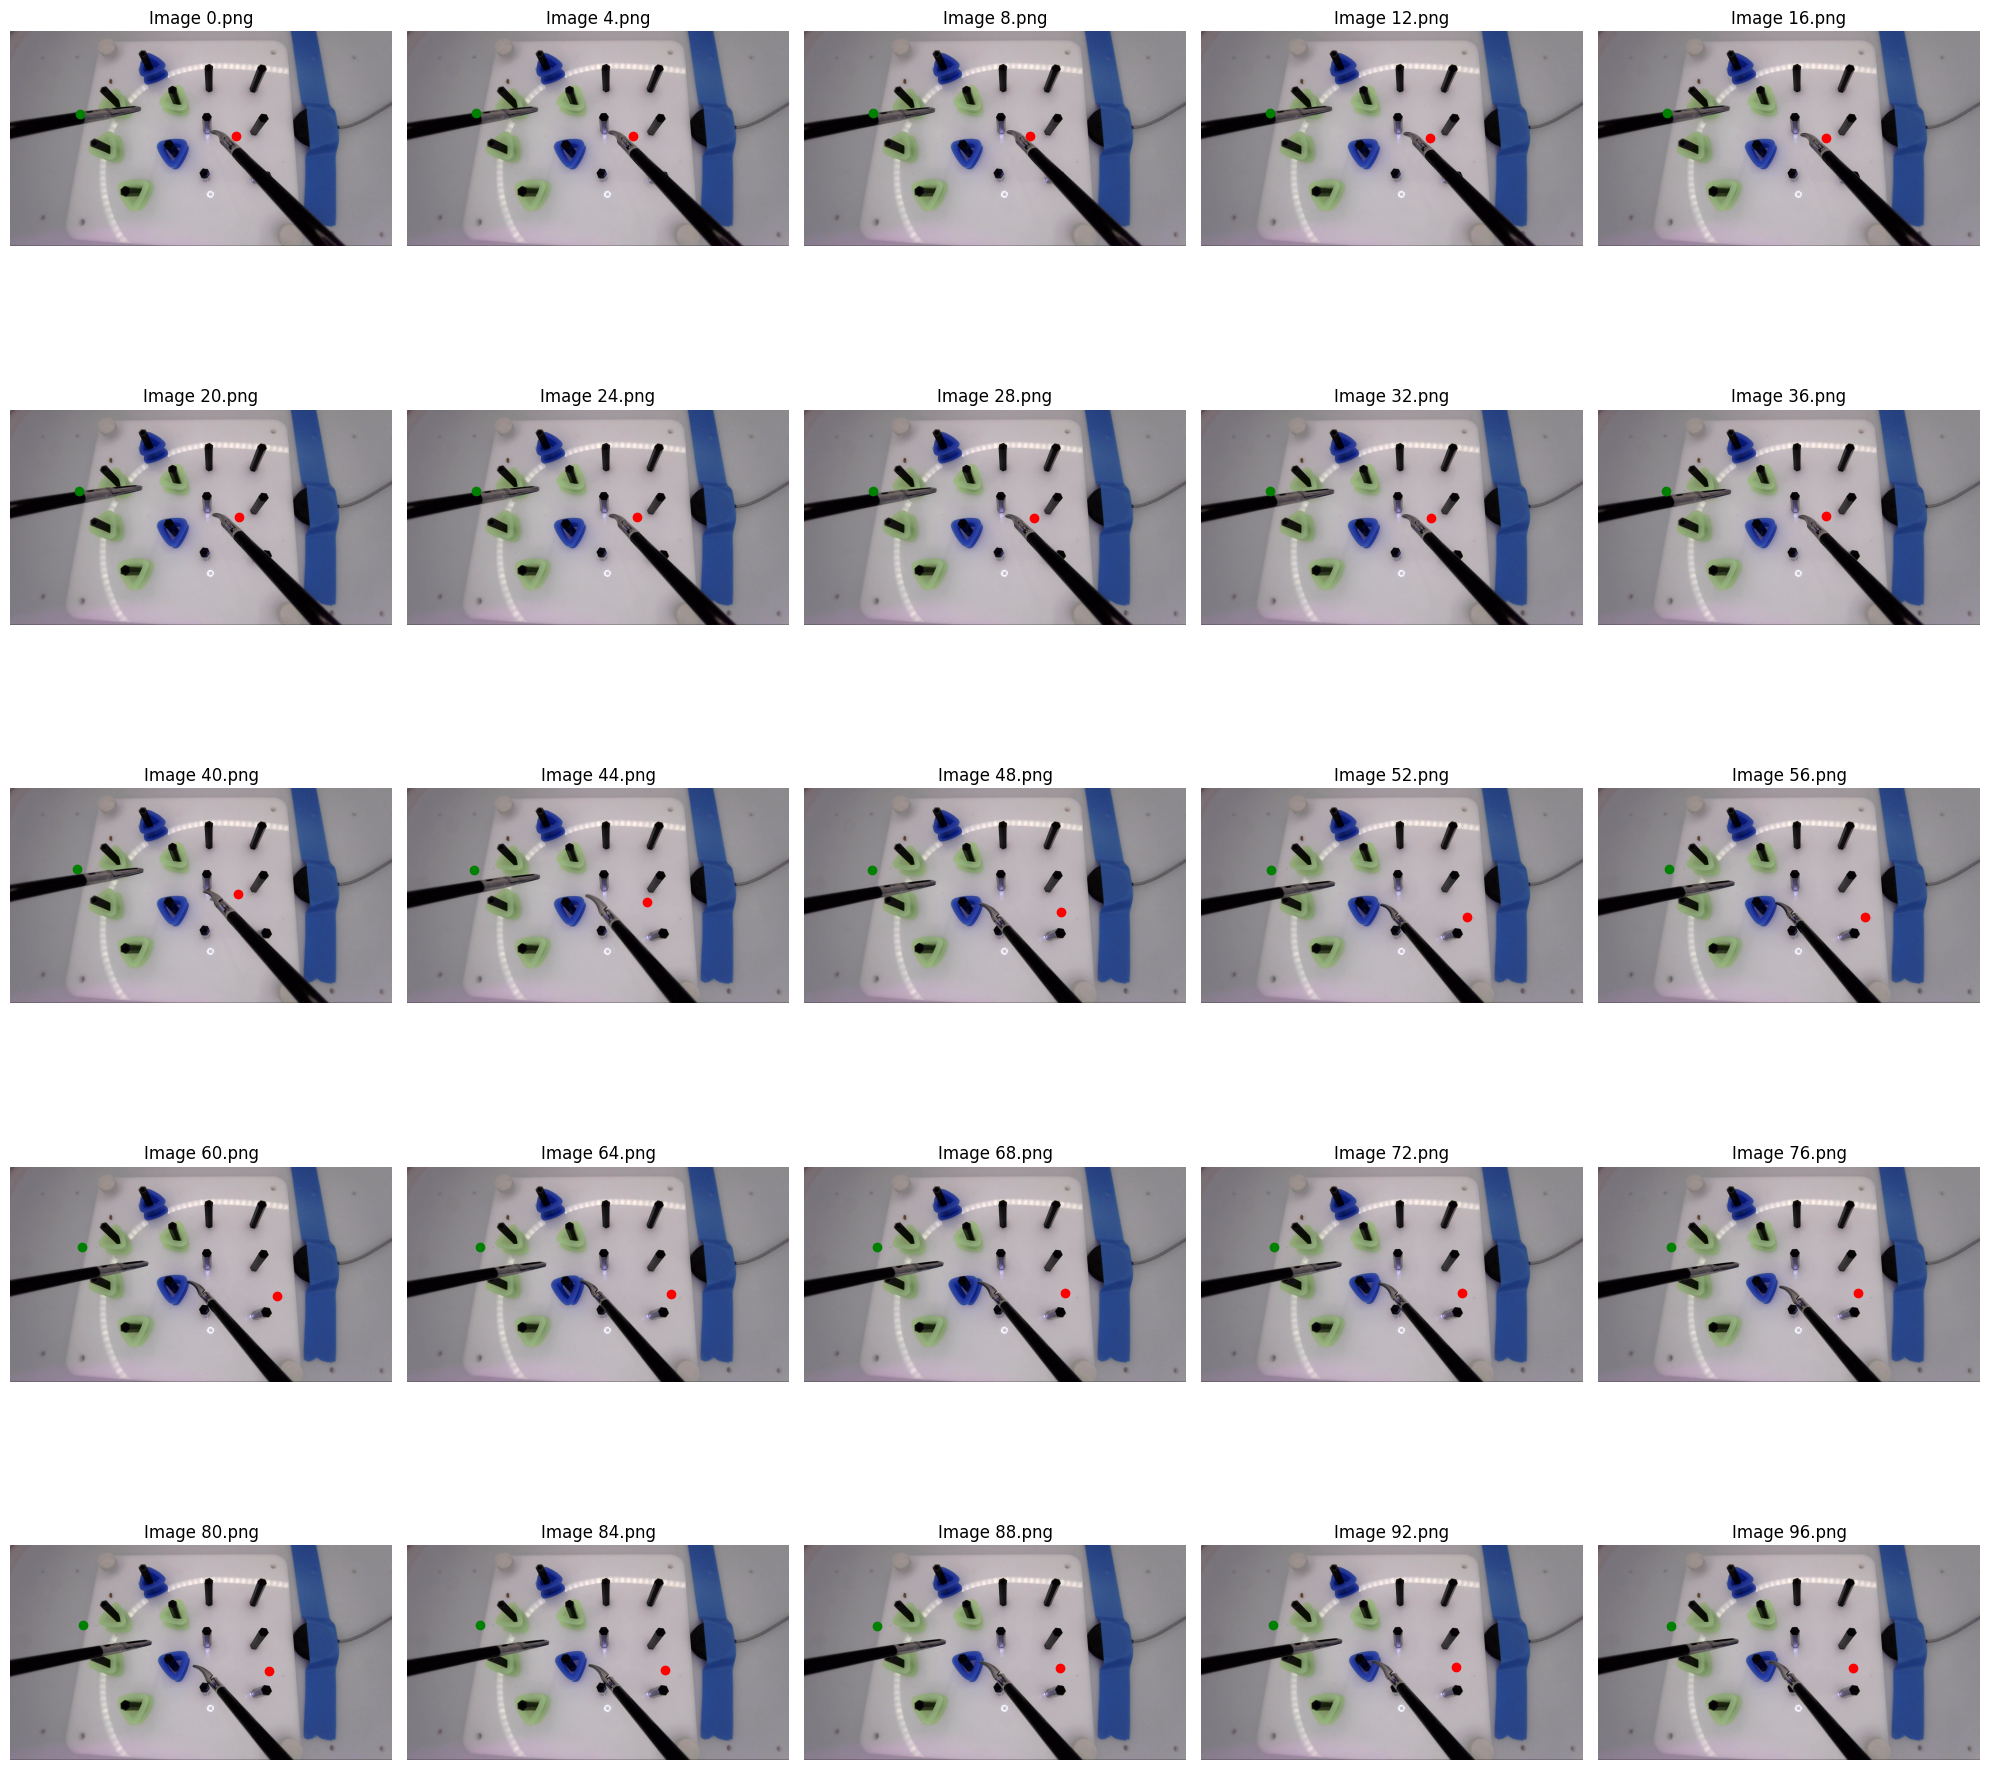

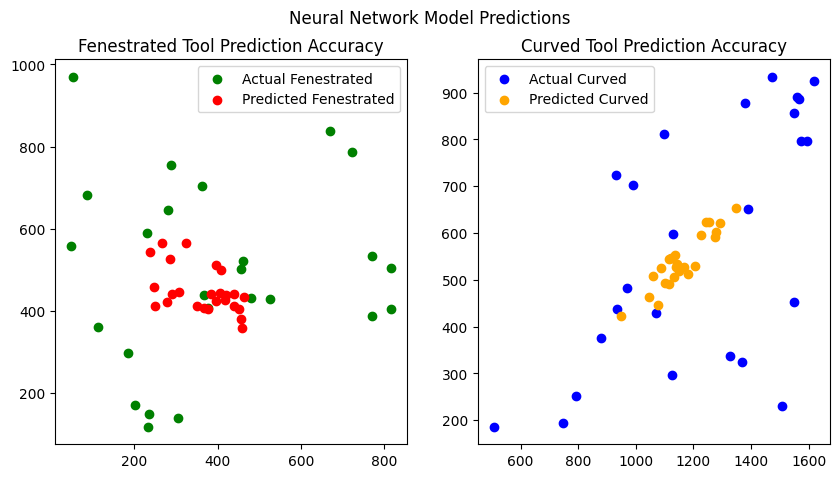

In [129]:
import json
import os
from random import seed
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

seed(0)
torch.manual_seed(0)

class CoordinateDataset(Dataset):
    def __init__(self, coordinates_3d, coordinates_2d):
        self.coordinates_3d = torch.tensor(coordinates_3d, dtype=torch.float32)
        self.coordinates_2d = torch.tensor(coordinates_2d, dtype=torch.float32)

    def __len__(self):
        return len(self.coordinates_3d)

    def __getitem__(self, idx):
        return self.coordinates_3d[idx], self.coordinates_2d[idx]


class CoordinateNN(nn.Module):
    def __init__(self):
        super(CoordinateNN, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


json_dir = "data/6DOF/output"
txt_dir = "data/6DOF/Test 5"
input_dir = "data/6DOF/inputs"

fenestrated_2d = []
curved_2d = []
coordinates_3d = {"Fenestrated": [], "Curved": []}

for i in file_indices:
    json_path = os.path.join(json_dir, f"{i}.json")
    if os.path.isfile(json_path):
        with open(json_path, "r") as f:
            output_json = json.load(f)
            if output_json.get("tooltips"):
                fenestrated_2d.append(
                    [output_json["tooltips"][0]["x"], output_json["tooltips"][0]["y"]]
                )
                curved_2d.append(
                    [output_json["tooltips"][1]["x"], output_json["tooltips"][1]["y"]]
                )

for i in file_indices:
    data = extract_data(f"{txt_dir}/{i}.txt")
    coordinates_3d["Fenestrated"].append(
        [
            data["Fenestrated"][0]["x"],
            data["Fenestrated"][0]["y"],
            data["Fenestrated"][0]["z"],
        ]
    )
    coordinates_3d["Curved"].append(
        [data["Curved"][0]["x"], data["Curved"][0]["y"], data["Curved"][0]["z"]]
    )

fenestrated_2d = np.array(fenestrated_2d)
curved_2d = np.array(curved_2d)
coordinates_3d["Fenestrated"] = np.array(coordinates_3d["Fenestrated"])
coordinates_3d["Curved"] = np.array(coordinates_3d["Curved"])

min_len_fen = min(len(fenestrated_2d), len(coordinates_3d["Fenestrated"]))
min_len_curv = min(len(curved_2d), len(coordinates_3d["Curved"]))

fenestrated_2d = fenestrated_2d[:min_len_fen]
coordinates_3d["Fenestrated"] = coordinates_3d["Fenestrated"][:min_len_fen]

curved_2d = curved_2d[:min_len_curv]
coordinates_3d["Curved"] = coordinates_3d["Curved"][:min_len_curv]


def train_model(model, criterion, optimizer, dataloader, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        if epoch % 10 == 9:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")


dataset_fen = CoordinateDataset(coordinates_3d["Fenestrated"], fenestrated_2d)
dataloader_fen = DataLoader(dataset_fen, batch_size=4, shuffle=True)

dataset_curv = CoordinateDataset(coordinates_3d["Curved"], curved_2d)
dataloader_curv = DataLoader(dataset_curv, batch_size=4, shuffle=True)

model_fen = CoordinateNN()
model_curv = CoordinateNN()

criterion = nn.MSELoss()
optimizer_fen = optim.Adam(model_fen.parameters(), lr=0.001)
optimizer_curv = optim.Adam(model_curv.parameters(), lr=0.001)

train_model(model_fen, criterion, optimizer_fen, dataloader_fen)
train_model(model_curv, criterion, optimizer_curv, dataloader_curv)


def predict_2d_position(model, three_d_position):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(three_d_position, dtype=torch.float32)
        outputs = model(inputs)
    return outputs.numpy()


def predict_and_show(index, show=True):
    data = extract_data(f"{txt_dir}/{index}.txt")
    fenestrated_3d_position = [
        data["Fenestrated"][0]["x"],
        data["Fenestrated"][0]["y"],
        data["Fenestrated"][0]["z"],
    ]
    curved_3d_position = [
        data["Curved"][0]["x"],
        data["Curved"][0]["y"],
        data["Curved"][0]["z"],
    ]

    fenestrated_2d_position = predict_2d_position(model_fen, fenestrated_3d_position)
    curved_2d_position = predict_2d_position(model_curv, curved_3d_position)

    if show:
        img_path = f"{input_dir}/{index}.png"
        img = Image.open(img_path)

        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.scatter(*fenestrated_2d_position, color="green", label="Fenestrated Tool")
        plt.scatter(*curved_2d_position, color="red", label="Curved Tool")
        plt.axis("off")

        plt.text(
            *fenestrated_2d_position, "Fenestrated Tool", color="green", fontsize=12
        )
        plt.text(*curved_2d_position, "Curved Tool", color="red", fontsize=12)
        plt.title(f"Image {index}.png")

        plt.legend()
        plt.show()

    print("Fenestrated Tool 2D Position:", fenestrated_2d_position)
    print("Curved Tool 2D Position:", curved_2d_position)


def show_images_in_grid(start_index):
    fig, axs = plt.subplots(5, 5, figsize=(20, 20))
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        index = start_index + i * 4
        data = extract_data(f"{txt_dir}/{index}.txt")
        fenestrated_3d_position = [
            data["Fenestrated"][0]["x"],
            data["Fenestrated"][0]["y"],
            data["Fenestrated"][0]["z"],
        ]
        curved_3d_position = [
            data["Curved"][0]["x"],
            data["Curved"][0]["y"],
            data["Curved"][0]["z"],
        ]

        fenestrated_2d_position = predict_2d_position(
            model_fen, fenestrated_3d_position
        )
        curved_2d_position = predict_2d_position(model_curv, curved_3d_position)

        img_path = f"{input_dir}/{index}.png"
        img = Image.open(img_path)
        ax.imshow(img)
        ax.scatter(*fenestrated_2d_position, color="green")
        ax.scatter(*curved_2d_position, color="red")
        ax.axis("off")
        ax.set_title(f"Image {index}.png")
    plt.tight_layout()
    plt.show()


def evaluate_predictions():
    predicted_fen = []
    actual_fen = []
    predicted_curv = []
    actual_curv = []

    index = 0
    
    for i in file_indices:
        data = extract_data(f"{txt_dir}/{i}.txt")
        fenestrated_3d_position = [
            data["Fenestrated"][0]["x"],
            data["Fenestrated"][0]["y"],
            data["Fenestrated"][0]["z"],
        ]
        curved_3d_position = [
            data["Curved"][0]["x"],
            data["Curved"][0]["y"],
            data["Curved"][0]["z"],
        ]

        fenestrated_2d_position = predict_2d_position(
            model_fen, fenestrated_3d_position
        )
        curved_2d_position = predict_2d_position(model_curv, curved_3d_position)

        predicted_fen.append(fenestrated_2d_position)
        actual_fen.append([fenestrated_2d[index][0], fenestrated_2d[index][1]])

        predicted_curv.append(curved_2d_position)
        actual_curv.append([curved_2d[index][0], curved_2d[index][1]])
        
        index += 1
        
    predicted_fen = np.array(predicted_fen)
    actual_fen = np.array(actual_fen)
    predicted_curv = np.array(predicted_curv)
    actual_curv = np.array(actual_curv)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(
        actual_fen[:, 0], actual_fen[:, 1], color="green", label="Actual Fenestrated"
    )
    plt.scatter(
        predicted_fen[:, 0],
        predicted_fen[:, 1],
        color="red",
        label="Predicted Fenestrated",
    )
    plt.title("Fenestrated Tool Prediction Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(
        actual_curv[:, 0], actual_curv[:, 1], color="blue", label="Actual Curved"
    )
    plt.scatter(
        predicted_curv[:, 0],
        predicted_curv[:, 1],
        color="orange",
        label="Predicted Curved",
    )
    plt.title("Curved Tool Prediction Accuracy")
    plt.legend()

    plt.suptitle("Neural Network Model Predictions")
    plt.show()


# Example usage
show_images_in_grid(0)  # Show a batch of 25 images starting from index 0
evaluate_predictions()  # Evaluate and plot the prediction accuracy

Fenestrated:
 Original: [-46.4807 147.7925]
 Pixel: [1086.56496874  137.56730981]

Curved:
 Original: [-83.8522 128.8187]
 Pixel: [1220.01085288  140.55597761]



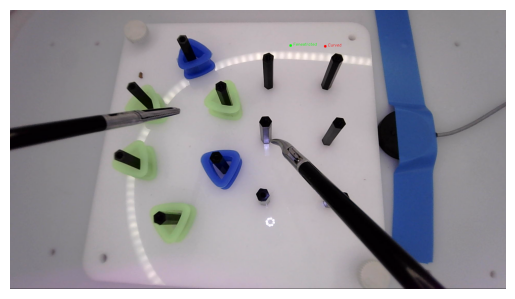

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "data/6DOF/Test 5/0.bmp"  # Replace with your actual image path
image = cv2.imread(image_path)

# Camera intrinsic parameters
fx = 800  # Focal length in x-axis
fy = 800  # Focal length in y-axis
cx = image.shape[1] / 2  # Optical center in x-axis
cy = image.shape[0] / 2  # Optical center in y-axis

# Camera extrinsic parameters are unkown, so we'll use the identity matrix
R = np.eye(3)  # Rotation matrix
T = np.zeros((3, 1))  # Translation vector

# Projection matrix
K = np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]])

# Extract 3D coordinates for the tools
points_3d = {
    "Fenestrated": np.array(
        [
            data["Fenestrated"][0]["x"],
            data["Fenestrated"][0]["y"],
            data["Fenestrated"][0]["z"],
        ]
    ),
    "Curved": np.array(
        [data["Curved"][0]["x"], data["Curved"][0]["y"], data["Curved"][0]["z"]]
    ),
}

# Convert 3D points to homogeneous coordinates
points_3d_homogeneous = {
    tool: np.hstack((coord, [1])) for tool, coord in points_3d.items()
}

# Apply extrinsic parameters (transform to camera coordinate system)
extrinsic_matrix = np.hstack((R, T))

# Project 3D points to 2D
points_2d_homogeneous = {
    tool: K @ (extrinsic_matrix @ coord.reshape(-1, 1))
    for tool, coord in points_3d_homogeneous.items()
}
points_2d = {
    tool: coord[:2] / coord[2] for tool, coord in points_2d_homogeneous.items()
}

# Convert to pixel coordinates
pixel_coords = {tool: coord.flatten() for tool, coord in points_2d.items()}

# Draw the tool positions on the image
for tool, coord in pixel_coords.items():
    color = (0, 255, 0) if tool == "Fenestrated" else (0, 0, 255)
    cv2.circle(image, (int(coord[0]), int(coord[1])), 5, color, -1)
    cv2.putText(
        image,
        tool,
        (int(coord[0]) + 10, int(coord[1])),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        color,
        1,
    )
    print(f"{tool}:\n Original: {points_3d[tool][:2]}\n Pixel: {coord}\n")

# Display the image with the overlaid tool positions
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

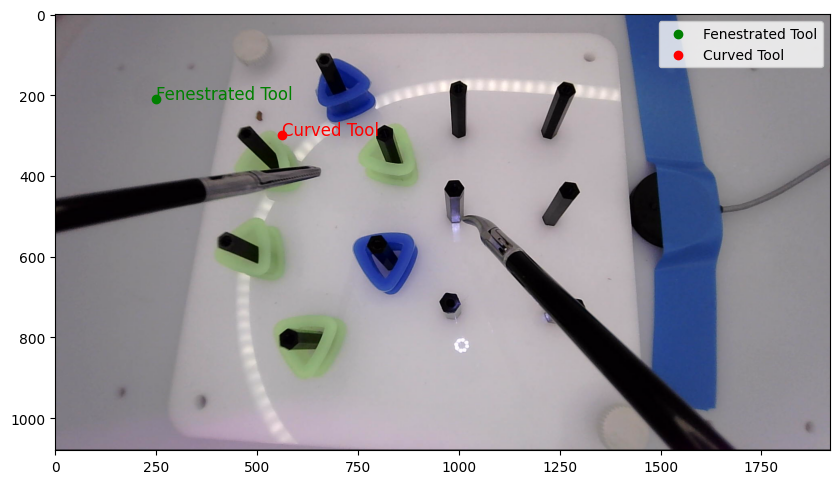

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from PIL import Image

# Known 3D positions and corresponding 2D image coordinates (manually annotated)
known_3d_positions = np.array(
    [
        [data["Fenestrated"][0]["x"], data["Fenestrated"][0]["y"], data["Fenestrated"][0]["z"]],
        [data["Curved"][0]["x"], data["Curved"][0]["y"], data["Curved"][0]["z"]],
    ]
)

known_2d_positions = np.array(
    [
        [250, 210],  # Fenestrated tool
        [562, 299],  # Curved tool
    ]
)

# Fit a regression model
reg_x = LinearRegression().fit(known_3d_positions, known_2d_positions[:, 0])
reg_y = LinearRegression().fit(known_3d_positions, known_2d_positions[:, 1])


# Function to predict 2D coordinates from 3D coordinates
def predict_2d_position(three_d_position):
    x = reg_x.predict([three_d_position])[0]
    y = reg_y.predict([three_d_position])[0]
    return [x, y]


# Predict positions for fenestrated and curved tools
fenestrated_3d_position = [-46.4807, 147.7925, -293.7982]
curved_3d_position = [-83.8522, 128.8187, -257.996]

fenestrated_2d_position = predict_2d_position(fenestrated_3d_position)
curved_2d_position = predict_2d_position(curved_3d_position)

# Load image
img_path = "data/6DOF/Test 5/0.bmp"
img = Image.open(img_path)

# Plot image and points
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.scatter(*fenestrated_2d_position, color="green", label="Fenestrated Tool")
plt.scatter(*curved_2d_position, color="red", label="Curved Tool")

# Annotate points
plt.text(*fenestrated_2d_position, "Fenestrated Tool", color="green", fontsize=12)
plt.text(*curved_2d_position, "Curved Tool", color="red", fontsize=12)

plt.legend()
plt.show()

{'tooltips': [{'x': 496, 'y': 424}]}
{'tooltips': [{'x': 494, 'y': 428}]}
{'tooltips': [{'x': 492, 'y': 422}]}
{'tooltips': [{'x': 492, 'y': 406}]}
{'tooltips': [{'x': 500, 'y': 418}]}
{'tooltips': [{'x': 492, 'y': 418}]}
{'tooltips': [{'x': 494, 'y': 420}]}
{'tooltips': [{'x': 496, 'y': 430}]}
{'tooltips': [{'x': 494, 'y': 426}]}
{'tooltips': [{'x': 494, 'y': 414}]}
{'tooltips': [{'x': 494, 'y': 422}]}


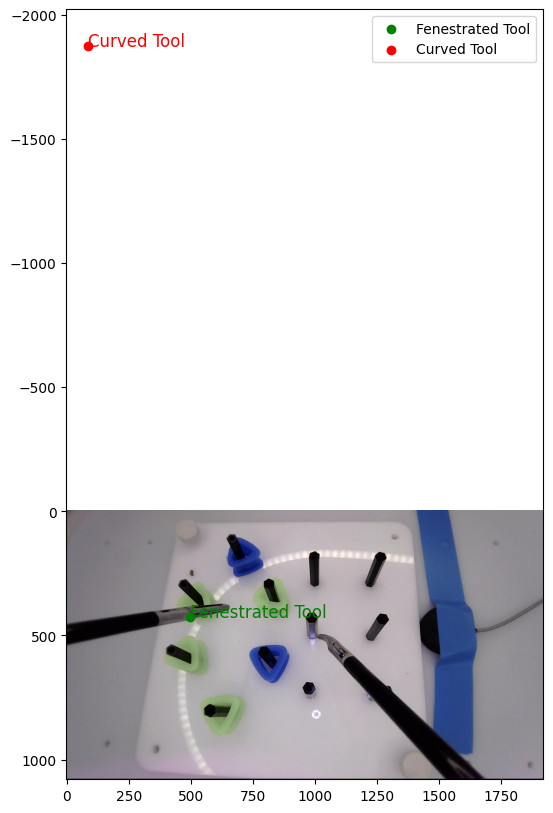

In [50]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from PIL import Image

# Parse JSON data
json_path = "data/6DOF/output/output.json"
with open(json_path, "r") as f:
    output_json = json.load(f)

# Extract 2D coordinates from JSON data
coordinates_2d = []
for item in output_json:
    print(item)
    if item.get("tooltips"):
        coordinates_2d.append([item["tooltips"][0]["x"], item["tooltips"][0]["y"]])

coordinates_2d = np.array(coordinates_2d)

# Ensure both arrays have the same number of entries
min_len = min(len(coordinates_2d), len(coordinates_3d))
coordinates_2d = coordinates_2d[:min_len]
coordinates_3d = coordinates_3d[:min_len]

# Fit a regression model
reg_x = LinearRegression().fit(coordinates_3d, coordinates_2d[:, 0])
reg_y = LinearRegression().fit(coordinates_3d, coordinates_2d[:, 1])


# Function to predict 2D coordinates from 3D coordinates
def predict_2d_position(three_d_position):
    x = reg_x.predict([three_d_position])[0]
    y = reg_y.predict([three_d_position])[0]
    return [x, y]


# Predict positions for fenestrated and curved tools
fenestrated_3d_position = [-46.4807, 147.7925, -293.7982]
curved_3d_position = [-83.8522, 128.8187, -257.996]

fenestrated_2d_position = predict_2d_position(fenestrated_3d_position)
curved_2d_position = predict_2d_position(curved_3d_position)

# Load image
img_path = "data/6DOF/Test 5/0.bmp"
img = Image.open(img_path)

# Plot image and points
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.scatter(*fenestrated_2d_position, color="green", label="Fenestrated Tool")
plt.scatter(*curved_2d_position, color="red", label="Curved Tool")

# Annotate points
plt.text(*fenestrated_2d_position, "Fenestrated Tool", color="green", fontsize=12)
plt.text(*curved_2d_position, "Curved Tool", color="red", fontsize=12)

plt.legend()
plt.show()